## Reserch Question:

 **Identify the most profitable products and customers, and explore trends in sales and profitability over time**

Importing Libraries

In [543]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load Data

In [544]:
data = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')


In [545]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [546]:
data.shape

(9994, 21)

In [547]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [549]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [550]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

check for duplicate

In [551]:
data.duplicated().sum()

0

check for missing values

In [552]:
data.isnull().sum().sum()

0

check for unique and nuique values

In [553]:
# Check unique values in a column
unique_values = data["Segment"].unique().sum()

In [554]:
unique_values

'ConsumerCorporateHome Office'

In [555]:
unique_values = data["Segment"].nunique()

In [556]:
unique_values

3

correct any errors in the data, such as typos or incorrect formatting

In [557]:
data['Ship Mode'] = data['Ship Mode'].str.replace('typo', 'corrected_value')

 Calculate the correlation matrix

In [558]:
correlation_matrix = data.corr()

<ipython-input-558-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [559]:
correlation_matrix

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


Calculate the covariance matrix

In [560]:
covariance_matrix = data.cov()

<ipython-input-560-3a9c964699d4>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = data.cov()


In [561]:
covariance_matrix

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,8.324169e+06,8.946577e+05,-2442.819776,-25.782598,8.029358,8446.585421
Postal Code,8.946577e+05,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-2.442820e+03,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,-2.578260e+01,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,8.029358e+00,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,8.446585e+03,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


Data Preprocessing

In [562]:
cleaned_data['Order Date'] = pd.to_datetime(cleaned_data['Order Date'])

In [563]:
monthly = cleaned_data.groupby(cleaned_data['Order Date'].dt.month_name())[['Sales', 'Profit','Quantity','Discount']].sum()

In [564]:
monthly.head()

,Sales,Profit,Quantity,Discount
Order Date,,,,
April,30263.6130,4520.9418,1521,47.30
August,31956.8610,5720.6045,1593,48.05
December,64636.3943,10775.7808,3166,92.62
February,15310.7474,2541.3515,681,17.47
January,16352.8120,2654.1180,880,22.60


Handling and Removing Outliers:

In [565]:
# Define a function to remove outliers using the IQR method
def remove_outliers(data, columns, threshold=1.5):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

# Specify the columns to remove outliers from
columns_to_clean = ['Sales', 'Quantity','Profit','Discount']

# Remove outliers
cleaned_data = remove_outliers(data, columns_to_clean)

#print(cleaned_data)

In [566]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [567]:
cleaned_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


count Plot:

<Axes: xlabel='Ship Mode', ylabel='count'>

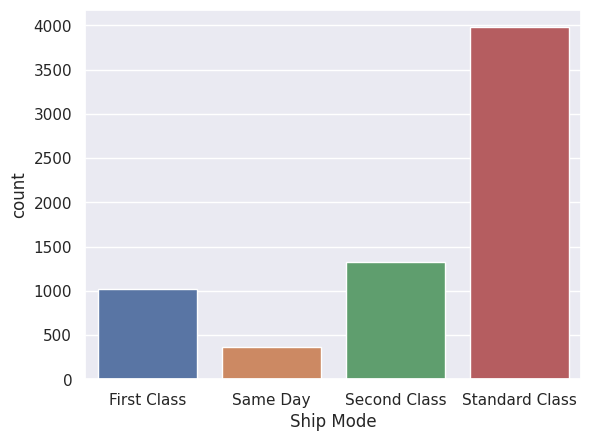

In [568]:
cleaned_data['Ship Mode'] = cleaned_data['Ship Mode'].astype('category')
sns.countplot(x= 'Ship Mode',data=cleaned_data)


<Axes: xlabel='Segment', ylabel='count'>

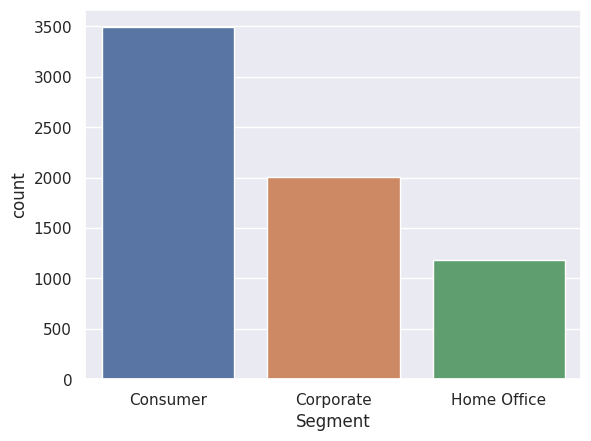

In [569]:
cleaned_data['Segment'] = cleaned_data['Segment'].astype('category')
sns.countplot(x= 'Segment',data=cleaned_data)

<Axes: xlabel='Category', ylabel='count'>

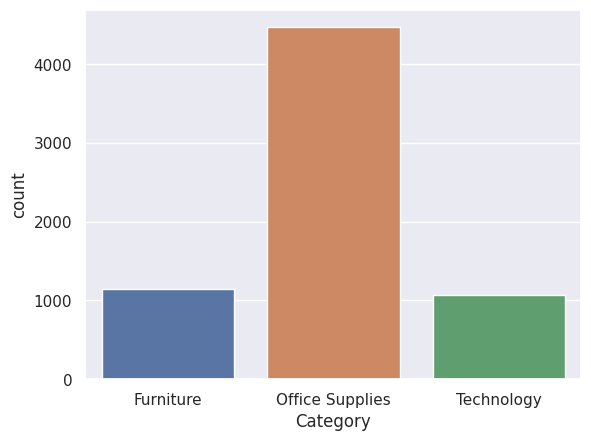

In [570]:
cleaned_data['Category'] = cleaned_data['Category'].astype('category')
sns.countplot(x= 'Category',data=cleaned_data)

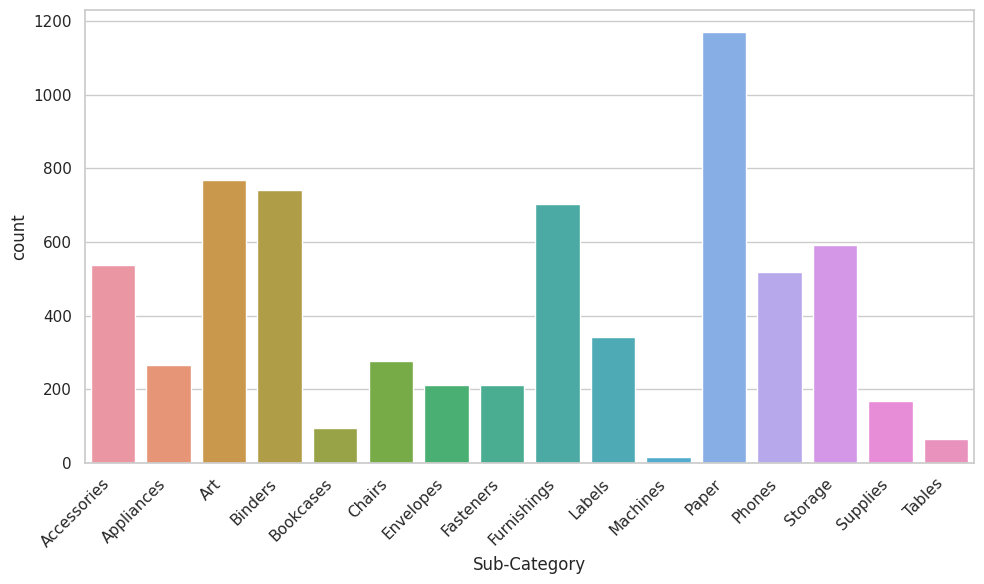

In [571]:

cleaned_data['Sub-Category'] = cleaned_data['Sub-Category'].astype('category')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sub-Category', data=cleaned_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


Histogram plot of Sales and Profit

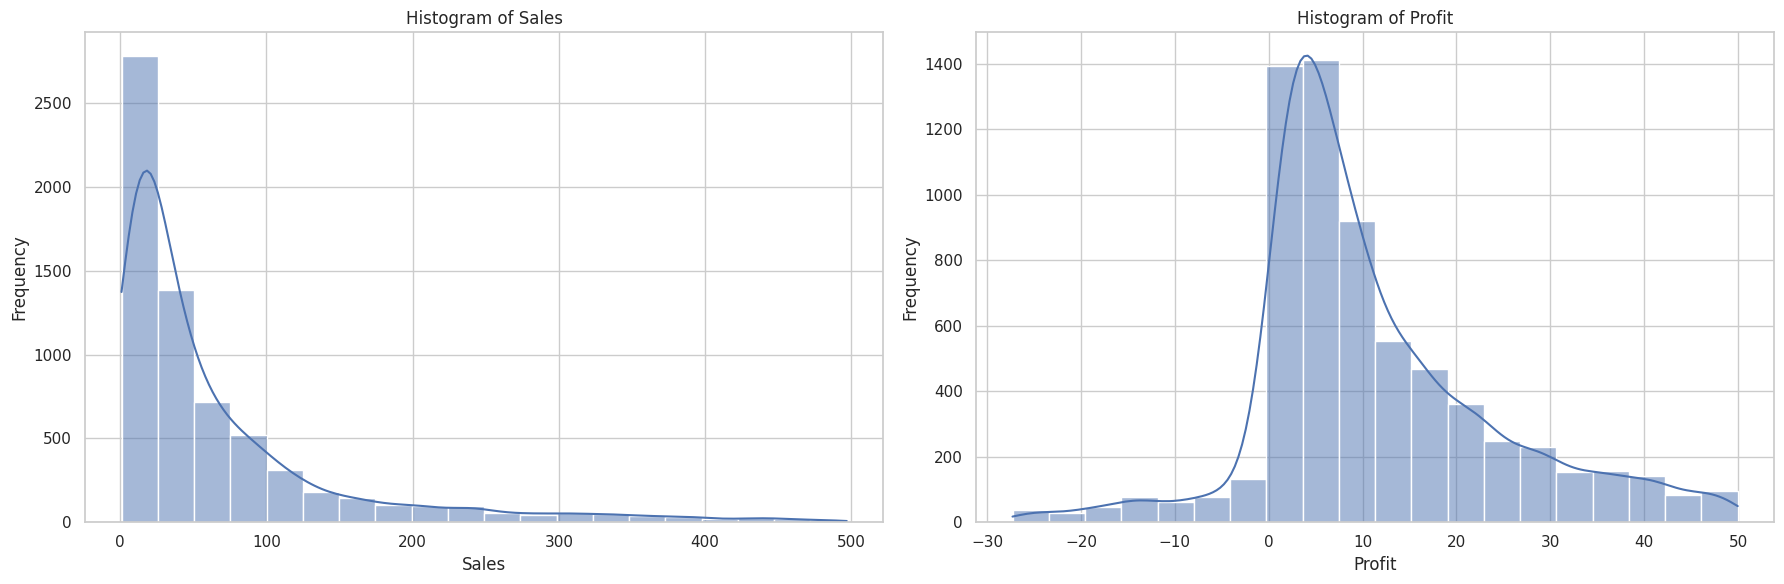

In [572]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.histplot(cleaned_data['Sales'], bins=20, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.grid(True)


# Subplot 2
plt.subplot(122)
sns.histplot(cleaned_data['Profit'], bins=20, kde=True)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.grid(True)



plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()

Summary Statistics of Sales and Profit

In [573]:
mean = cleaned_data[['Sales',"Profit"]].mean()
median = cleaned_data[['Sales',"Profit"]].median()
std_dev = cleaned_data[['Sales',"Profit"]].std()

print("Mean:")
print(mean)

print("\nMedian:")
print(median)

print("\nStandard Deviation:")
print(std_dev)


Mean:
Sales     66.473469
Profit    11.118789
dtype: float64

Median:
Sales     34.0650
Profit     7.7679
dtype: float64

Standard Deviation:
Sales     84.422655
Profit    12.823062
dtype: float64


Histogram Plot of Quantity and Discount

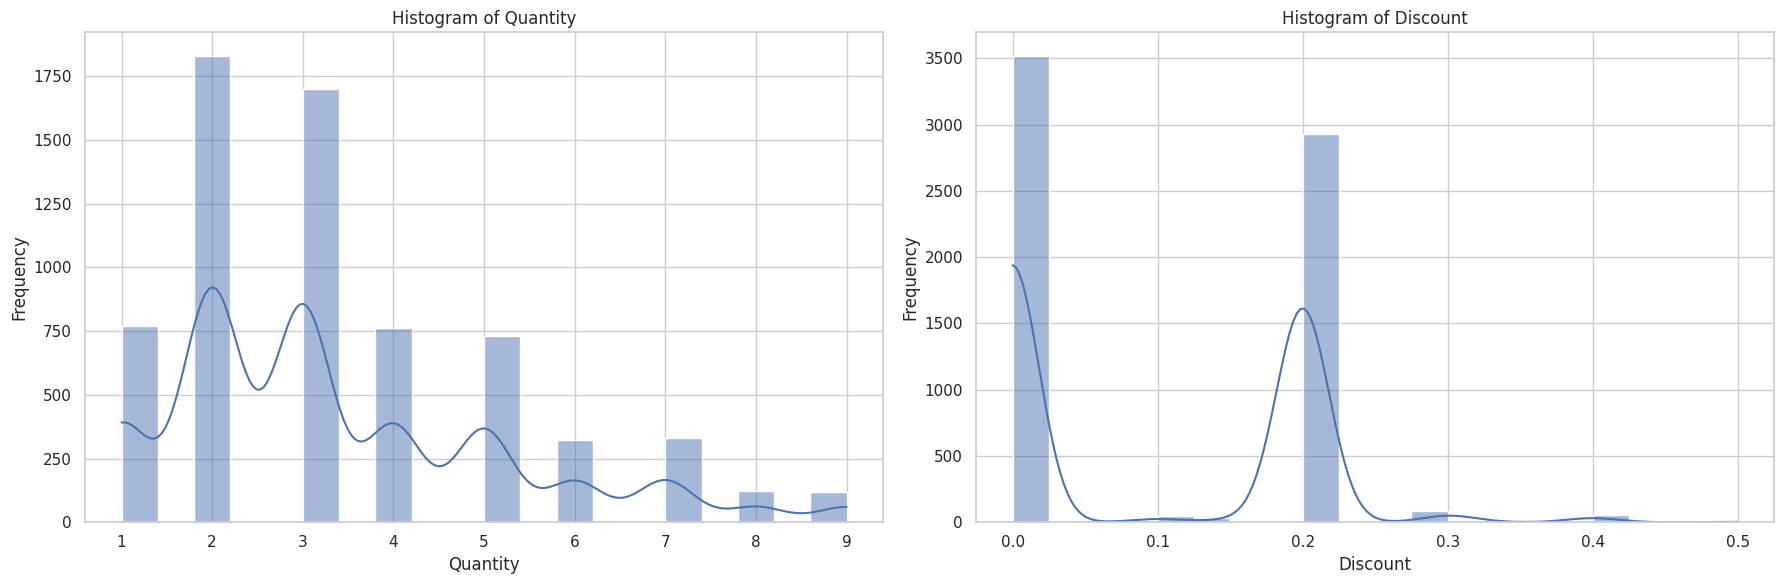

In [574]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.histplot(cleaned_data['Quantity'], bins=20, kde=True)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.grid(True)


# Subplot 2
plt.subplot(122)
sns.histplot(cleaned_data['Discount'], bins=20, kde=True)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Histogram of Discount')
plt.grid(True)



plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()

Summary Statistics of Quantity and Discount

In [575]:
mean = cleaned_data[['Quantity',"Discount"]].mean()
median = cleaned_data[['Quantity',"Discount"]].median()
std_dev = cleaned_data[['Quantity',"Discount"]].std()

print("Mean:")
print(mean)

print("\nMedian:")
print(median)

print("\nStandard Deviation:")
print(std_dev)

Mean:
Quantity    3.367106
Discount    0.097053
dtype: float64

Median:
Quantity    3.0
Discount    0.0
dtype: float64

Standard Deviation:
Quantity    1.863172
Discount    0.105390
dtype: float64


Bar chart of Orders by ship Mode

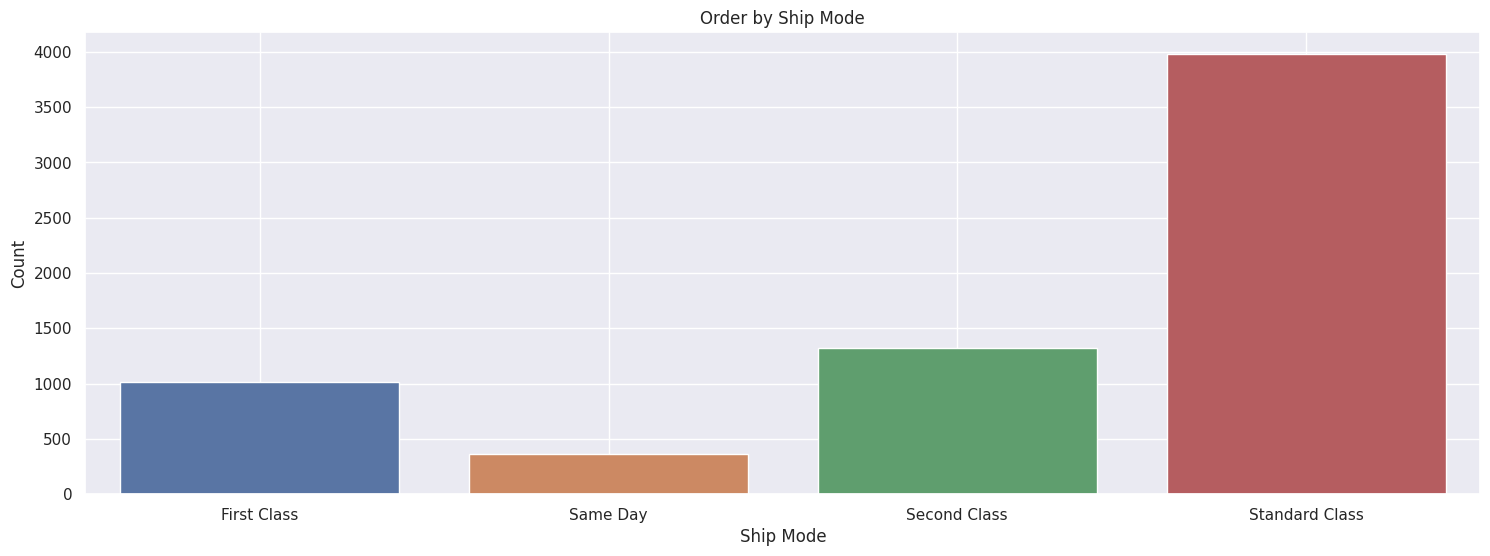

In [576]:
# Set the style to "darkgrid"
sns.set(style="darkgrid")

# Create a figure with a specific size
plt.figure(figsize=(18, 6))

# Assuming 'data' is your DataFrame, you can use 'countplot' as follows:
sns.countplot(data=cleaned_data, x='Ship Mode')

# Set the labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Order by Ship Mode')

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Bar chart of Sales and Profit by Category

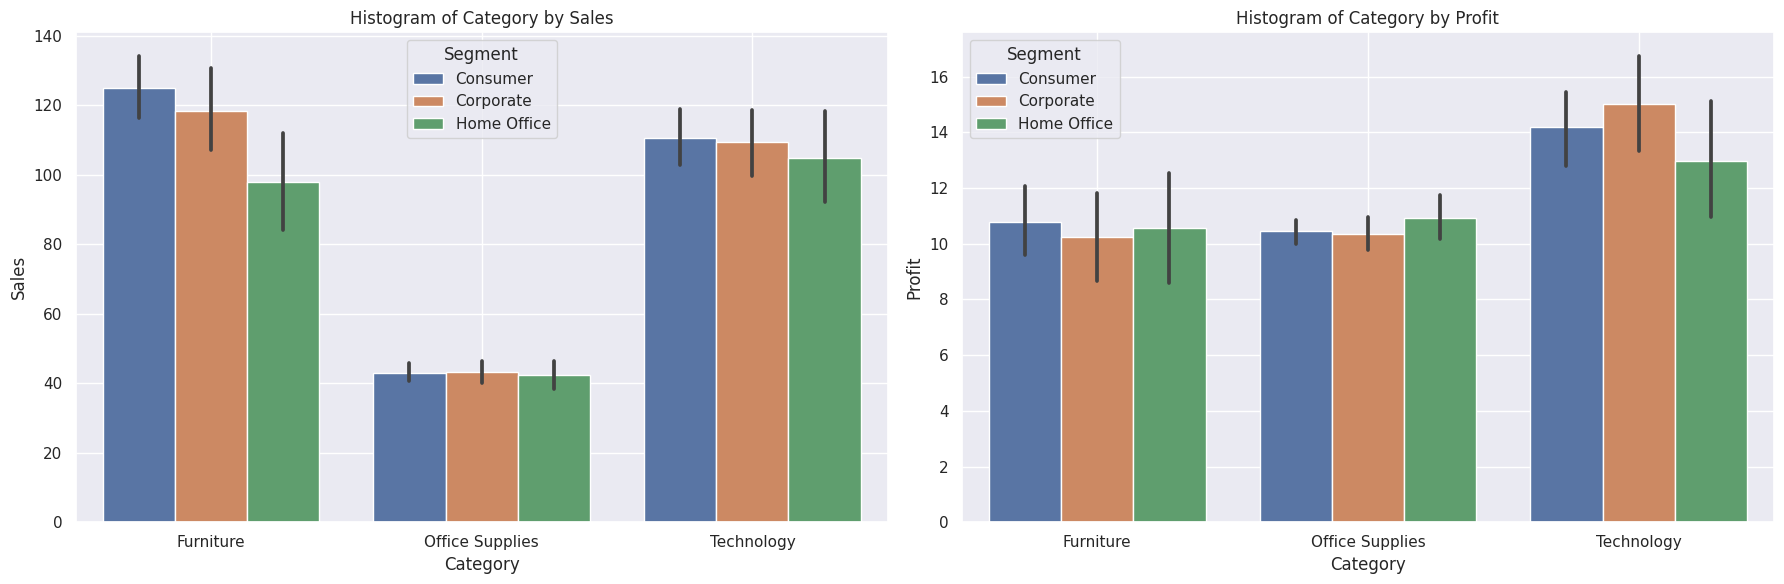

In [577]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.barplot(x="Category", y="Sales", hue=cleaned_data['Segment'],data=cleaned_data)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Histogram of Category by Sales')
plt.grid(True)


# Subplot 2
plt.subplot(122)
sns.barplot(x="Category", y="Profit", hue=cleaned_data['Segment'],data=cleaned_data)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Histogram of Category by Profit')
plt.grid(True)

plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()

Bar chart of ship mode by Sales and Profit

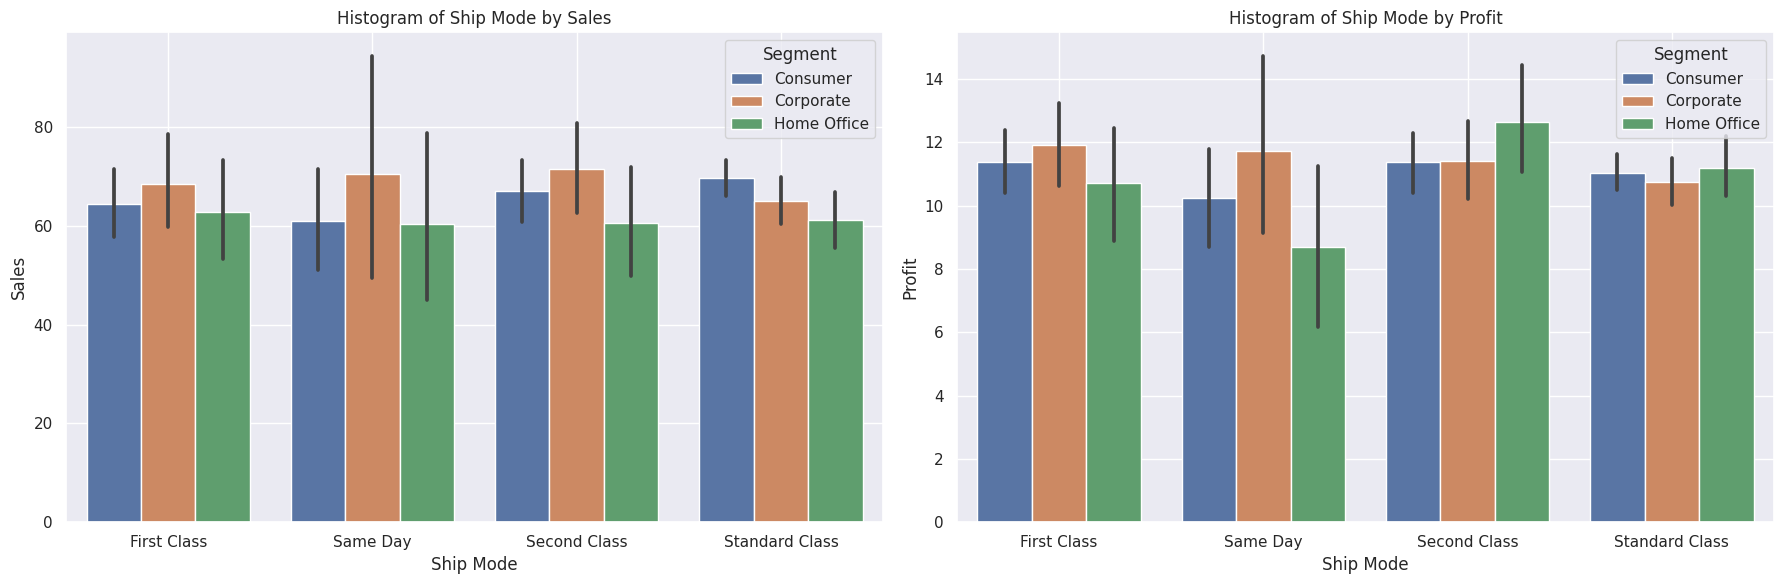

In [578]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.barplot(x="Ship Mode", y="Sales", hue=cleaned_data['Segment'],data=cleaned_data)
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.title('Histogram of Ship Mode by Sales')
plt.grid(True)


# Subplot 2
plt.subplot(122)
sns.barplot(x="Ship Mode", y="Profit", hue=cleaned_data['Segment'],data=cleaned_data)
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.title('Histogram of Ship Mode by Profit')
plt.grid(True)

plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()

Bar chart of Region by Sales and Profit

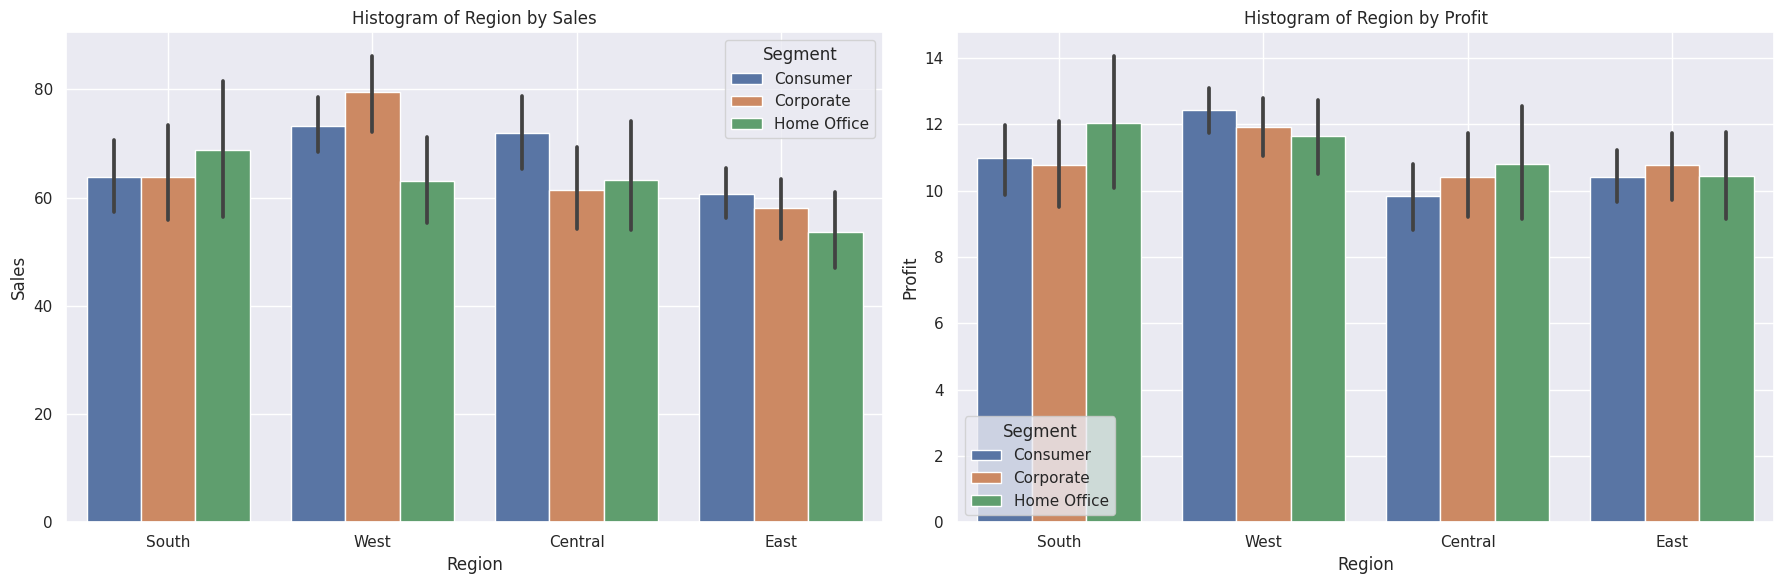

In [579]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.barplot(x="Region", y="Sales", hue=cleaned_data['Segment'],data=cleaned_data)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Histogram of Region by Sales')
plt.grid(True)


# Subplot 2
plt.subplot(122)
sns.barplot(x="Region", y="Profit", hue=cleaned_data['Segment'],data=cleaned_data)
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Histogram of Region by Profit')
plt.grid(True)

plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()

Line chart of Sales over time

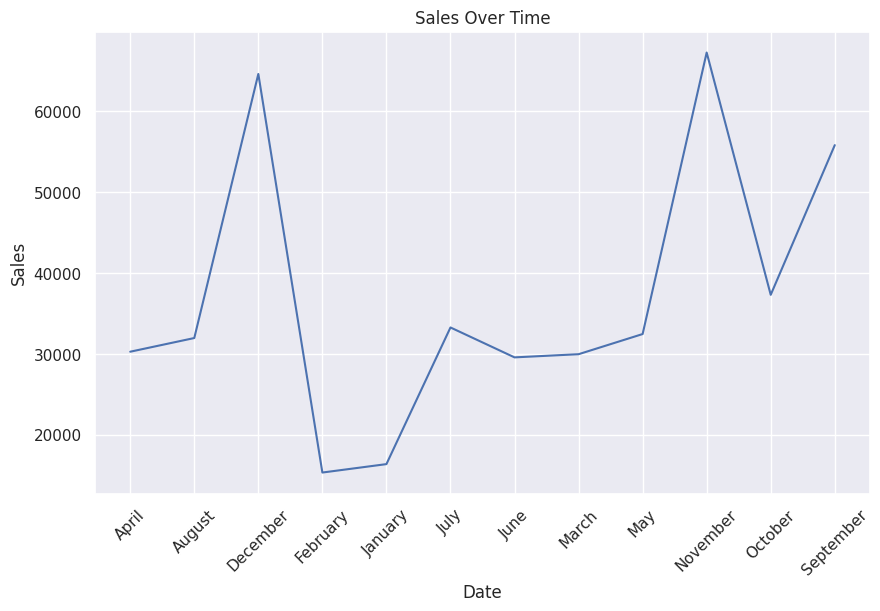

In [580]:
plt.figure(figsize=(10, 6))
sns.lineplot(monthly['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Line chart of Profit over time

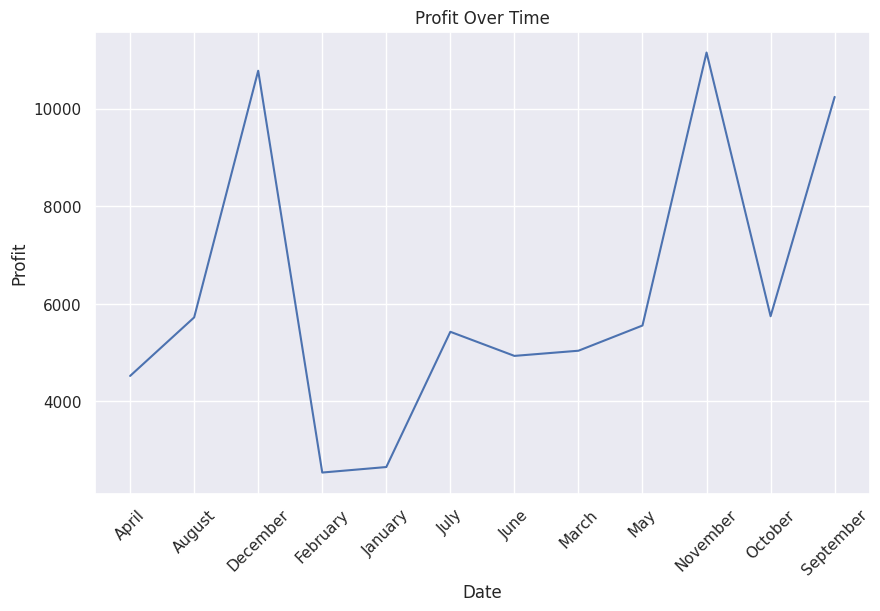

In [581]:
plt.figure(figsize=(10, 6))
sns.lineplot(monthly['Profit'])
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Summary Statistics of numerical data

In [582]:
numeric_data = cleaned_data[["Sales", "Quantity", "Profit","Discount"]]

In [583]:
numeric_data.head()

,Sales,Quantity,Profit,Discount
0,261.960,2,41.9136,0.0
2,14.620,2,6.8714,0.0
4,22.368,2,2.5164,0.2
5,48.860,7,14.1694,0.0
6,7.280,4,1.9656,0.0


In [584]:
numeric_data.describe()

,Sales,Quantity,Profit,Discount
count,6682.000000,6682.000000,6682.000000,6682.000000
mean,66.473469,3.367106,11.118789,0.097053
std,84.422655,1.863172,12.823062,0.105390
min,0.990000,1.000000,-27.292200,0.000000
25%,14.765000,2.000000,3.207300,0.000000
50%,34.065000,3.000000,7.767900,0.000000
75%,81.549000,4.000000,16.941550,0.200000
max,496.860000,9.000000,49.970400,0.500000


In [585]:

# Calculate the mean, median, standard deviation, and quartiles for each column
mean = numeric_data.mean()
median = numeric_data.median()
std_dev = numeric_data.std()
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)

# Create a summary DataFrame
summary = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Std Dev': std_dev,
    'Q1 (25%)': q1,
    'Q3 (75%)': q3
})

print("Summary of the Data:")
print(summary)


Summary of the Data:
               Mean   Median    Std Dev  Q1 (25%)  Q3 (75%)
Sales     66.473469  34.0650  84.422655   14.7650  81.54900
Quantity   3.367106   3.0000   1.863172    2.0000   4.00000
Profit    11.118789   7.7679  12.823062    3.2073  16.94155
Discount   0.097053   0.0000   0.105390    0.0000   0.20000


Top selling products by product category?

In [586]:
# Group the data by 'Category' and find the top-selling product in each category
top_selling_products = cleaned_data.groupby('Category')['Product Name', 'Sales'].max().reset_index()

print("Top Selling Products by Category:")
print(top_selling_products)

Top Selling Products by Category:
          Category                                       Product Name    Sales
0        Furniture  Westinghouse Mesh Shade Clip-On Gooseneck Lamp...  492.835
1  Office Supplies                         Zipper Ring Binder Pockets  496.860
2       Technology                 netTALK DUO VoIP Telephone Service  494.376


<ipython-input-586-167f9f2c44a4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_selling_products = cleaned_data.groupby('Category')['Product Name', 'Sales'].max().reset_index()


The top performing sales regions?

In [587]:
# Group the data by 'Region' and calculate the total sales for each region
region_sales = cleaned_data.groupby('Region')['Sales'].sum().reset_index()

# Sort the regions by total sales in descending order to find the top-performing regions
top_performing_regions = region_sales.sort_values(by='Sales', ascending=False)

print("Top Performing Sales Regions:")
print(top_performing_regions)

Top Performing Sales Regions:
    Region        Sales
3     West  172352.6745
1     East  111895.0430
0  Central   90164.8644
2    South   69763.1380


customer satisfaction vary by product category and region?

In [588]:
# Calculate the count of interactions (customers) within each product category and region
interaction_counts = cleaned_data.groupby(['Category', 'Region']).size().reset_index(name='Customer Count')

# Pivot the data for better visualization
pivot_table = interaction_counts.pivot(index='Category', columns='Region', values='Customer Count')

print("Customer Interactions by Product Category and Region:")
print(pivot_table)


Customer Interactions by Product Category and Region:
Region           Central  East  South  West
Category                                   
Furniture            140   352    202   446
Office Supplies      935  1290    709  1535
Technology           267   267    168   371


Identify the most profitable products

In [589]:
top_products = cleaned_data.groupby('Product Name')['Profit'].sum().nlargest(5).reset_index()

print("Top 10 Most Profitable Products:")
print(top_products)

Top 10 Most Profitable Products:
                                        Product Name    Profit
0                                  Easy-staple paper  875.5942
1                                    Staple envelope  630.1874
2  Logitech 910-002974 M325 Wireless Mouse for We...  274.7084
3                   GBC Prestige Therm-A-Bind Covers  267.9611
4                                 Maxell 4.7GB DVD-R  248.3250


Identify the most profitable customers

In [590]:
top_customers = cleaned_data.groupby('Customer Name')['Profit'].sum().nlargest(5).reset_index()

print("\nTop 10 Most Profitable Customers:")
print(top_customers)


Top 10 Most Profitable Customers:
      Customer Name    Profit
0     William Brown  360.5524
1          John Lee  350.5156
2   Chris Selesnick  330.1310
3  Jonathan Doherty  318.4312
4        Emily Phan  302.4119


 Explore trends in sales and profitability over time

In [591]:

# Convert 'Order Date' to datetime if needed
cleaned_data['Order Date'] = pd.to_datetime(cleaned_data['Order Date'], errors='coerce')
# The `errors='coerce'` parameter will handle any invalid dates gracefully, replacing them with NaT (Not a Timestamp).

# Now you can group by month using the 'to_period' method
monthly_trends = cleaned_data.groupby(cleaned_data['Order Date'].dt.to_period('M'))[['Sales', 'Profit']].sum()

# Alternatively, you can group by month name as follows
monthly = cleaned_data.groupby(cleaned_data['Order Date'].dt.month_name())[['Sales', 'Profit']].sum()


In [592]:
monthly_trends.index

PeriodIndex(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
             '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', name='Order Date')

In [593]:
monthly

,Sales,Profit
Order Date,,
April,30263.6130,4520.9418
August,31956.8610,5720.6045
December,64636.3943,10775.7808
February,15310.7474,2541.3515
January,16352.8120,2654.1180
July,33264.5060,5425.7960
June,29562.8836,4931.9337
March,29955.4560,5037.7608
May,32450.4594,5554.4803


Monthly trends in Sales and Profit over time

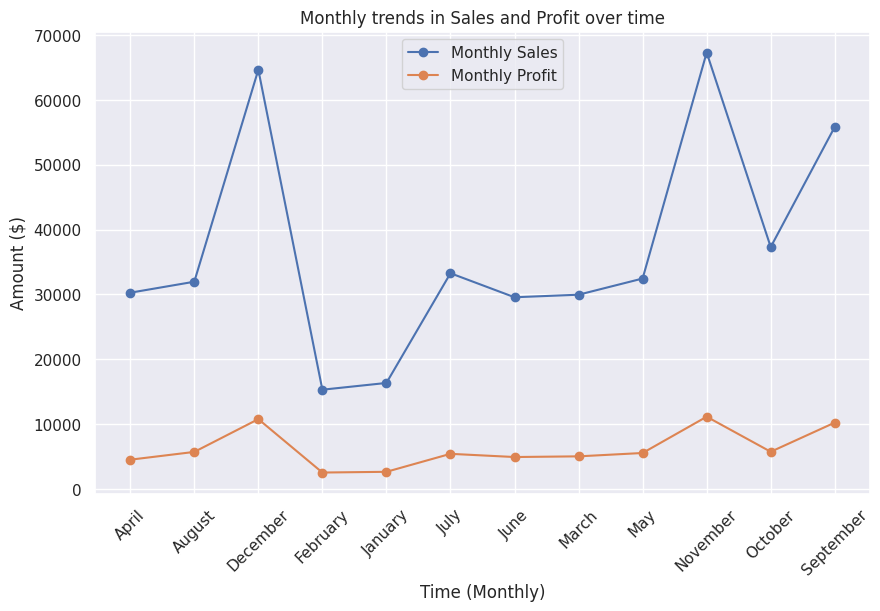

In [594]:
# Plot monthly trends
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['Sales'], label='Monthly Sales', marker='o')
plt.plot(monthly.index, monthly['Profit'], label='Monthly Profit', marker='o')
plt.xlabel('Time (Monthly)')
plt.ylabel('Amount ($)')
plt.title('Monthly trends in Sales and Profit over time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## **Conclusion:**

## Reserch Answer:
- Most profitable product is Easy-Staple paper with Profit of R875.5942

- Most Profitable customer is William Brown with Profit of R360.5524

- More Profit and Sales is earned during November and December and less Profit and Sales is earned during February and January

## Extra insights

-Profit/Sales in South and Central regions is less

-Profit/Sales in East and West regions is better than South and Central regions

-More orders used stardard class mode while few used same day mode to ship their products

-Office supplies category with product name, Zipper ring binder pockets generated more sales